In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
X = tf.range(-100, 100, 4)
y = X + 50

X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-50, -46, -42, -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,
          2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
         54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102,
        106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

In [3]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-50, -46, -42, -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,
          2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
         54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102,
        106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

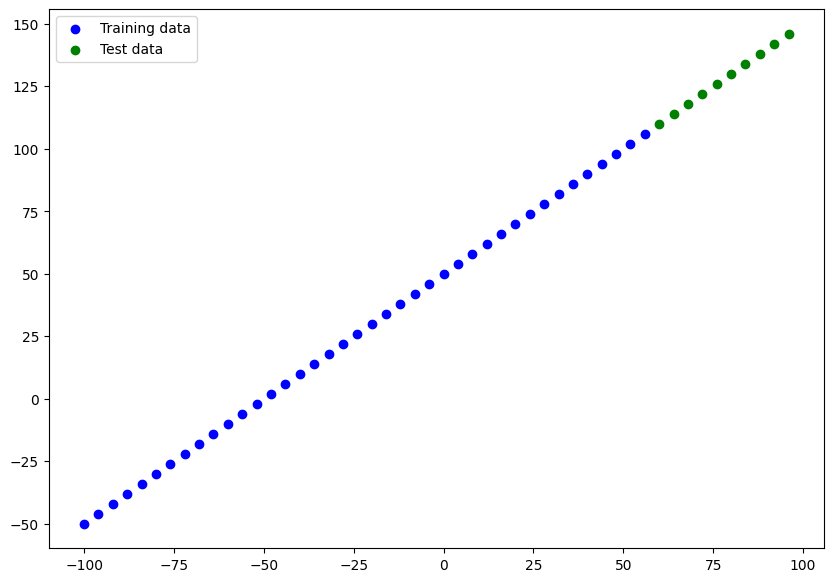

In [4]:
plt.figure(figsize=[10,7])
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();

## Creating model_1

### Parameters of model_1
1. no. of layers = 1
2. no. of neurons = 1
3. loss = mae
4. optimizer = SGD
5. epochs = 100

In [5]:
tf.random.set_seed(40)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


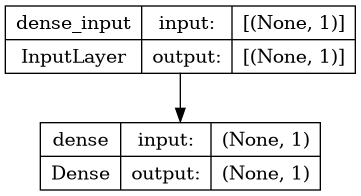

In [6]:
plot_model(model_1, show_shapes=True)

In [7]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 71.5440 - mae: 71.5440
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 44.4708 - mae: 44.4708
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 38.0005 - mae: 38.0005
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 41.4799 - mae: 41.4799
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 40.7885 - mae: 40.7885
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 38.1976 - mae: 38.1976
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 39.9946 - mae: 39.9946
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 38.8546 - mae: 38.8546
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 41.2051 - mae: 41.2051
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 39.9976 - mae: 39.9976
Epoch 11/100
2/2 [==============================] - 0s 5ms

In [8]:
y_pred_1 = model_1.predict(X_test)
y_pred_1, y_test

1/1 [==============================] - 0s 72ms/step


(array([[28.099213],
        [29.87566 ],
        [31.652107],
        [33.428555],
        [35.205   ],
        [36.98145 ],
        [38.757896],
        [40.534344],
        [42.31079 ],
        [44.087242]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

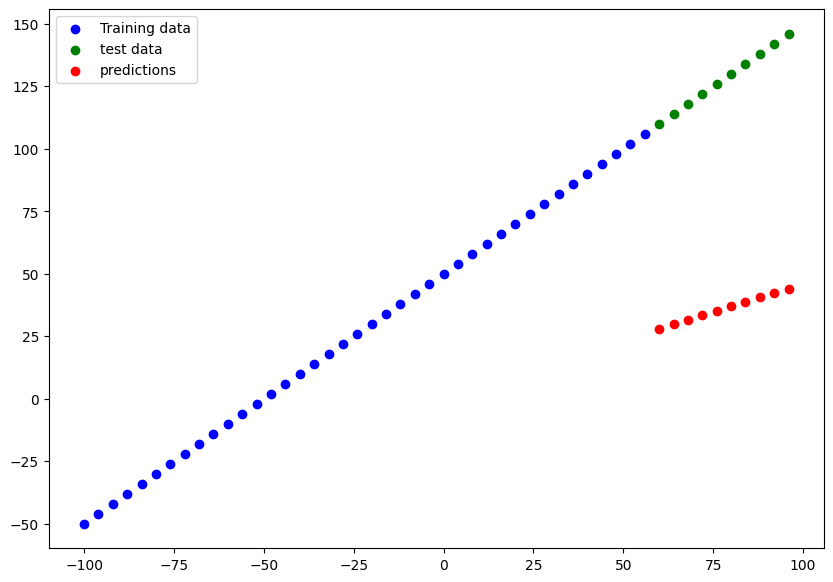

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label = "test data")
plt.scatter(X_test, y_pred_1, c="r", label = "predictions")
plt.legend();

## Conclusion

1. predicted values vs. test values are too far using simple model

## Creating model_2

### Parameters of model_2

1. no. of layers = 2
2. no. of neurons = 1 and 50
3. loss = mae
4. optimizer = SGD
5. epochs = 100
6. learning_rate = 0.01

In [10]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
               metrics = ["mae"])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


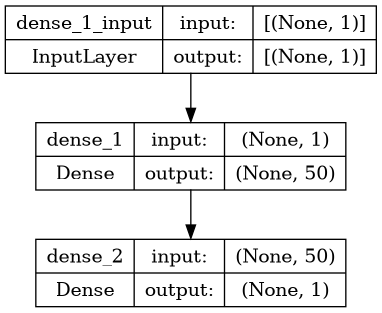

In [11]:
plot_model(model_2, show_shapes=True)

In [12]:
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 41.3127 - mae: 41.3127
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 47.0368 - mae: 47.0368
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 46.6260 - mae: 46.6260
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 39.2451 - mae: 39.2451
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 39.5594 - mae: 39.5594
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 38.6711 - mae: 38.6711
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 43.8869 - mae: 43.8869
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 39.1088 - mae: 39.1088
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 44.3522 - mae: 44.3522
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 41.5718 - mae: 41.5718
Epoch 11/100
2/2 [==============================] - 0s 6ms/

In [13]:
y_pred_2 = model_2.predict(X_test)
y_pred_2, y_test

1/1 [==============================] - 0s 48ms/step


(array([[37.93156 ],
        [40.300518],
        [42.669476],
        [45.03843 ],
        [47.407387],
        [49.77634 ],
        [52.145294],
        [54.51425 ],
        [56.88321 ],
        [59.25216 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

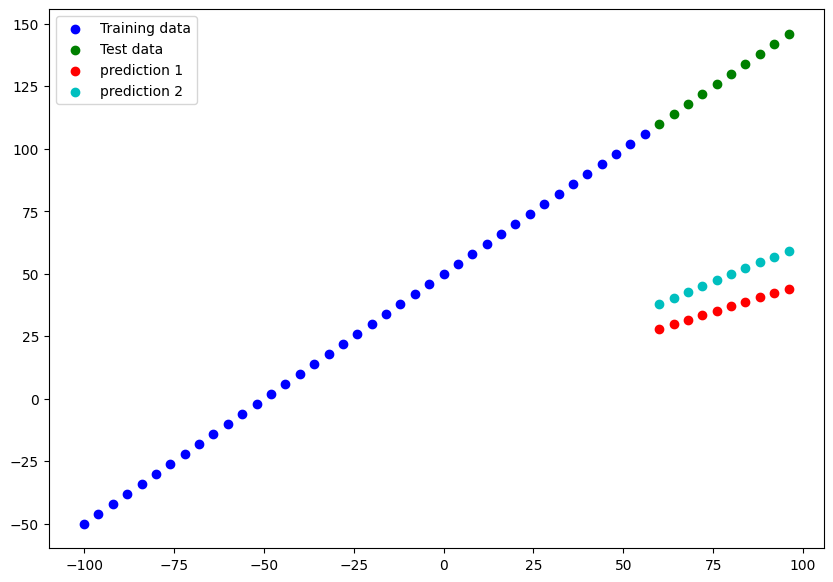

In [14]:
plt.figure(figsize = [10,7])
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label = "Test data")
plt.scatter(X_test, y_pred_1, c="r", label = "prediction 1")
plt.scatter(X_test, y_pred_2, c="c", label = "prediction 2")
plt.legend();

### Conclusion
1. model_2 precision increase when the layers and neurons increases
2. learning_rate of 0.01 also played significant part